# Major Project
**Task:-** COVID - 19 Analysis and Forecasting

**Name:-** Rohan Gupta

**email:-** rohaninjmu@gmail.com

In [1]:
import requests
from datetime import datetime
import pandas as pd

# Gather Data

Get the confirmed cases, deaths and recoveries for all countries from 22nd of January 2020 till today using disease.sh API.

In [3]:
def build_covid19_data():
    request_str = 'https://corona.lmao.ninja/v2/historical?lastdays=all'
    response = requests.get(request_str)
    json_data = response.json() if response and response.status_code == 200 else None
    
    df = None
    for country in json_data:
        res = build_country_data(country)
        if df is None:
            df = pd.DataFrame(res)
            df.index = pd.DatetimeIndex(df['Report_Date'])
            df = df.drop('Report_Date', 1)
            df = df.sort_values(by=['Report_Date'])
        else:
            df_new = pd.DataFrame(res)
            df_new.index = pd.DatetimeIndex(df_new['Report_Date'])
            df_new = df_new.drop('Report_Date', 1)
            df_new = df_new.sort_values(by=['Report_Date'])
            df = df.merge(df_new, left_index=True, right_index=True)
    
    df.to_csv('covid19_data.csv')
    
    return df

In [4]:
df = build_covid19_data()
df

,Afghanistan_cases,Afghanistan_deaths,Afghanistan_recovered,Albania_cases,Albania_deaths,Albania_recovered,Algeria_cases,Algeria_deaths,Algeria_recovered,Andorra_cases,Andorra_deaths,Andorra_recovered,Angola_cases,Angola_deaths,Angola_recovered,Antigua and Barbuda_cases,Antigua and Barbuda_deaths,Antigua and Barbuda_recovered,Argentina_cases,Argentina_deaths,Argentina_recovered,Armenia_cases,Armenia_deaths,Armenia_recovered,Australia_australian capital territory_cases,Australia_australian capital territory_deaths,Australia_australian capital territory_recovered,Australia_new south wales_cases,Australia_new south wales_deaths,Australia_new south wales_recovered,Australia_northern territory_cases,Australia_northern territory_deaths,Australia_northern territory_recovered,Australia_queensland_cases,Australia_queensland_deaths,Australia_queensland_recovered,Australia_south australia_cases,Australia_south australia_deaths,Australia_south australia_recovered,Australia_tasmania_cases,...,UK_isle of man_recovered,UK_montserrat_cases,UK_montserrat_deaths,UK_montserrat_recovered,UK_turks and caicos islands_cases,UK_turks and caicos islands_deaths,UK_turks and caicos islands_recovered,UK_cases,UK_deaths,UK_recovered,Uruguay_cases,Uruguay_deaths,Uruguay_recovered,Uzbekistan_cases,Uzbekistan_deaths,Uzbekistan_recovered,Vanuatu_cases,Vanuatu_deaths,Vanuatu_recovered,Venezuela_cases,Venezuela_deaths,Venezuela_recovered,Vietnam_cases,Vietnam_deaths,Vietnam_recovered,West Bank and Gaza_cases,West Bank and Gaza_deaths,West Bank and Gaza_recovered,Western Sahara_cases,Western Sahara_deaths,Western Sahara_recovered,Yemen_cases,Yemen_deaths,Yemen_recovered,Zambia_cases,Zambia_deaths,Zambia_recovered,Zimbabwe_cases,Zimbabwe_deaths,Zimbabwe_recovered
Report_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,42092,1558,34458,24206,559,12092,62051,2048,42037,5383,75,4248,12433,307,5899,131,3,122,1242182,33560,1062911,106424,1559,64179,114,3,111,4469,53,3156,39,0,33,1177,6,1163,515,4,492,230,...,326,13,1,12,707,6,691,1192013,49044,0,3514,62,2943,68730,585,65971,0,0,0,94883,826,89755,1213,35,1070,58158,515,50407,10,1,8,2070,602,1375,16954,349,15950,8531,253,8005
2020-11-09,42297,1574,34721,24731,571,12203,62693,2062,42325,5437,75,4332,12680,308,5927,131,3,122,1250499,33907,1073577,107466,1580,64910,114,3,111,4469,53,3156,40,0,33,1178,6,1163,517,4,495,230,...,329,13,1,12,707,6,695,1213363,49238,0,3560,62,2993,69027,588,66194,0,0,0,95149,830,90054,1215,35,1087,58838,521,50877,10,1,8,2071,605,1394,16971,349,16011,8561,254,8023
2020-11-10,42463,1577,34954,25294,579,12353,63446,2077,42626,5477,75,4405,12816,308,6036,131,3,122,1262476,34183,1081897,108687,1609,66835,114,3,111,4469,53,3156,41,0,33,1179,6,1163,517,4,495,230,...,329,13,1,

# List of Countries

In [12]:
countries = list(df.columns)
countries = countries[0::3]
countries = list(map(lambda x: x[:-6], countries))
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia_australian capital territory',
 'Australia_new south wales',
 'Australia_northern territory',
 'Australia_queensland',
 'Australia_south australia',
 'Australia_tasmania',
 'Australia_victoria',
 'Australia_western australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada_alberta',
 'Canada_british columbia',
 'Canada_diamond princess',
 'Canada_grand princess',
 'Canada_manitoba',
 'Canada_new brunswick',
 'Canada_newfoundland and labrador',
 'Canada_northwest territories',
 'Canada_nova scotia',
 'Canada_ontario',
 'Canada_prince edward island',
 'Canada_quebec',
 'Canada_saskatchewan',
 'Canada_yukon',
 'Central Afr

# Current number of Active Cases for all Countries

In [33]:
active_cases = []
for i in range(0, len(df.columns), 3):
  active_cases.append(df.iloc[-1, i] - (df.iloc[-1, i+1] + df.iloc[-1, i+2]) if df.iloc[-1, i] - (df.iloc[-1, i+1] + df.iloc[-1, i+2]) >=0 else 0)
active_cases

[6180,
 13039,
 20017,
 956,
 6488,
 4,
 149557,
 40882,
 0,
 1260,
 8,
 10,
 18,
 0,
 4,
 10,
 72159,
 17325,
 1777,
 2014,
 76190,
 9,
 16585,
 506502,
 2008,
 286,
 24,
 17927,
 32853,
 2639,
 362844,
 0,
 61168,
 108,
 14527,
 73,
 588,
 13,
 547,
 36012,
 20081,
 0,
 13,
 9650,
 350,
 294,
 11,
 1069,
 89793,
 68,
 113337,
 4408,
 23,
 2902,
 50,
 9264,
 1,
 6,
 1,
 39,
 2,
 27,
 0,
 0,
 0,
 6,
 0,
 6,
 152,
 8,
 1,
 25,
 10,
 0,
 0,
 4,
 0,
 0,
 0,
 46,
 0,
 100,
 5,
 47,
 17,
 0,
 36,
 3,
 11,
 58830,
 25,
 1400,
 391,
 45157,
 171,
 16348,
 432,
 4730,
 140201,
 3,
 1,
 13515,
 40,
 71,
 27,
 20227,
 9611,
 2918,
 2756,
 46,
 49,
 2352,
 197,
 36426,
 1,
 4177,
 715,
 6591,
 5717,
 4597,
 1911,
 2,
 1327,
 26,
 4,
 92,
 1712489,
 69,
 19,
 16913,
 276408,
 1541,
 42604,
 5,
 6511,
 1564,
 121,
 908,
 1227,
 12,
 54596,
 94704,
 472,
 484547,
 55274,
 144898,
 61046,
 41303,
 8848,
 635054,
 4366,
 12519,
 120975,
 8272,
 21480,
 2108,
 9418,
 8509,
 7870,
 1,
 7759,
 44222,
 95

# Bar Plot for Countries vs Active Cases

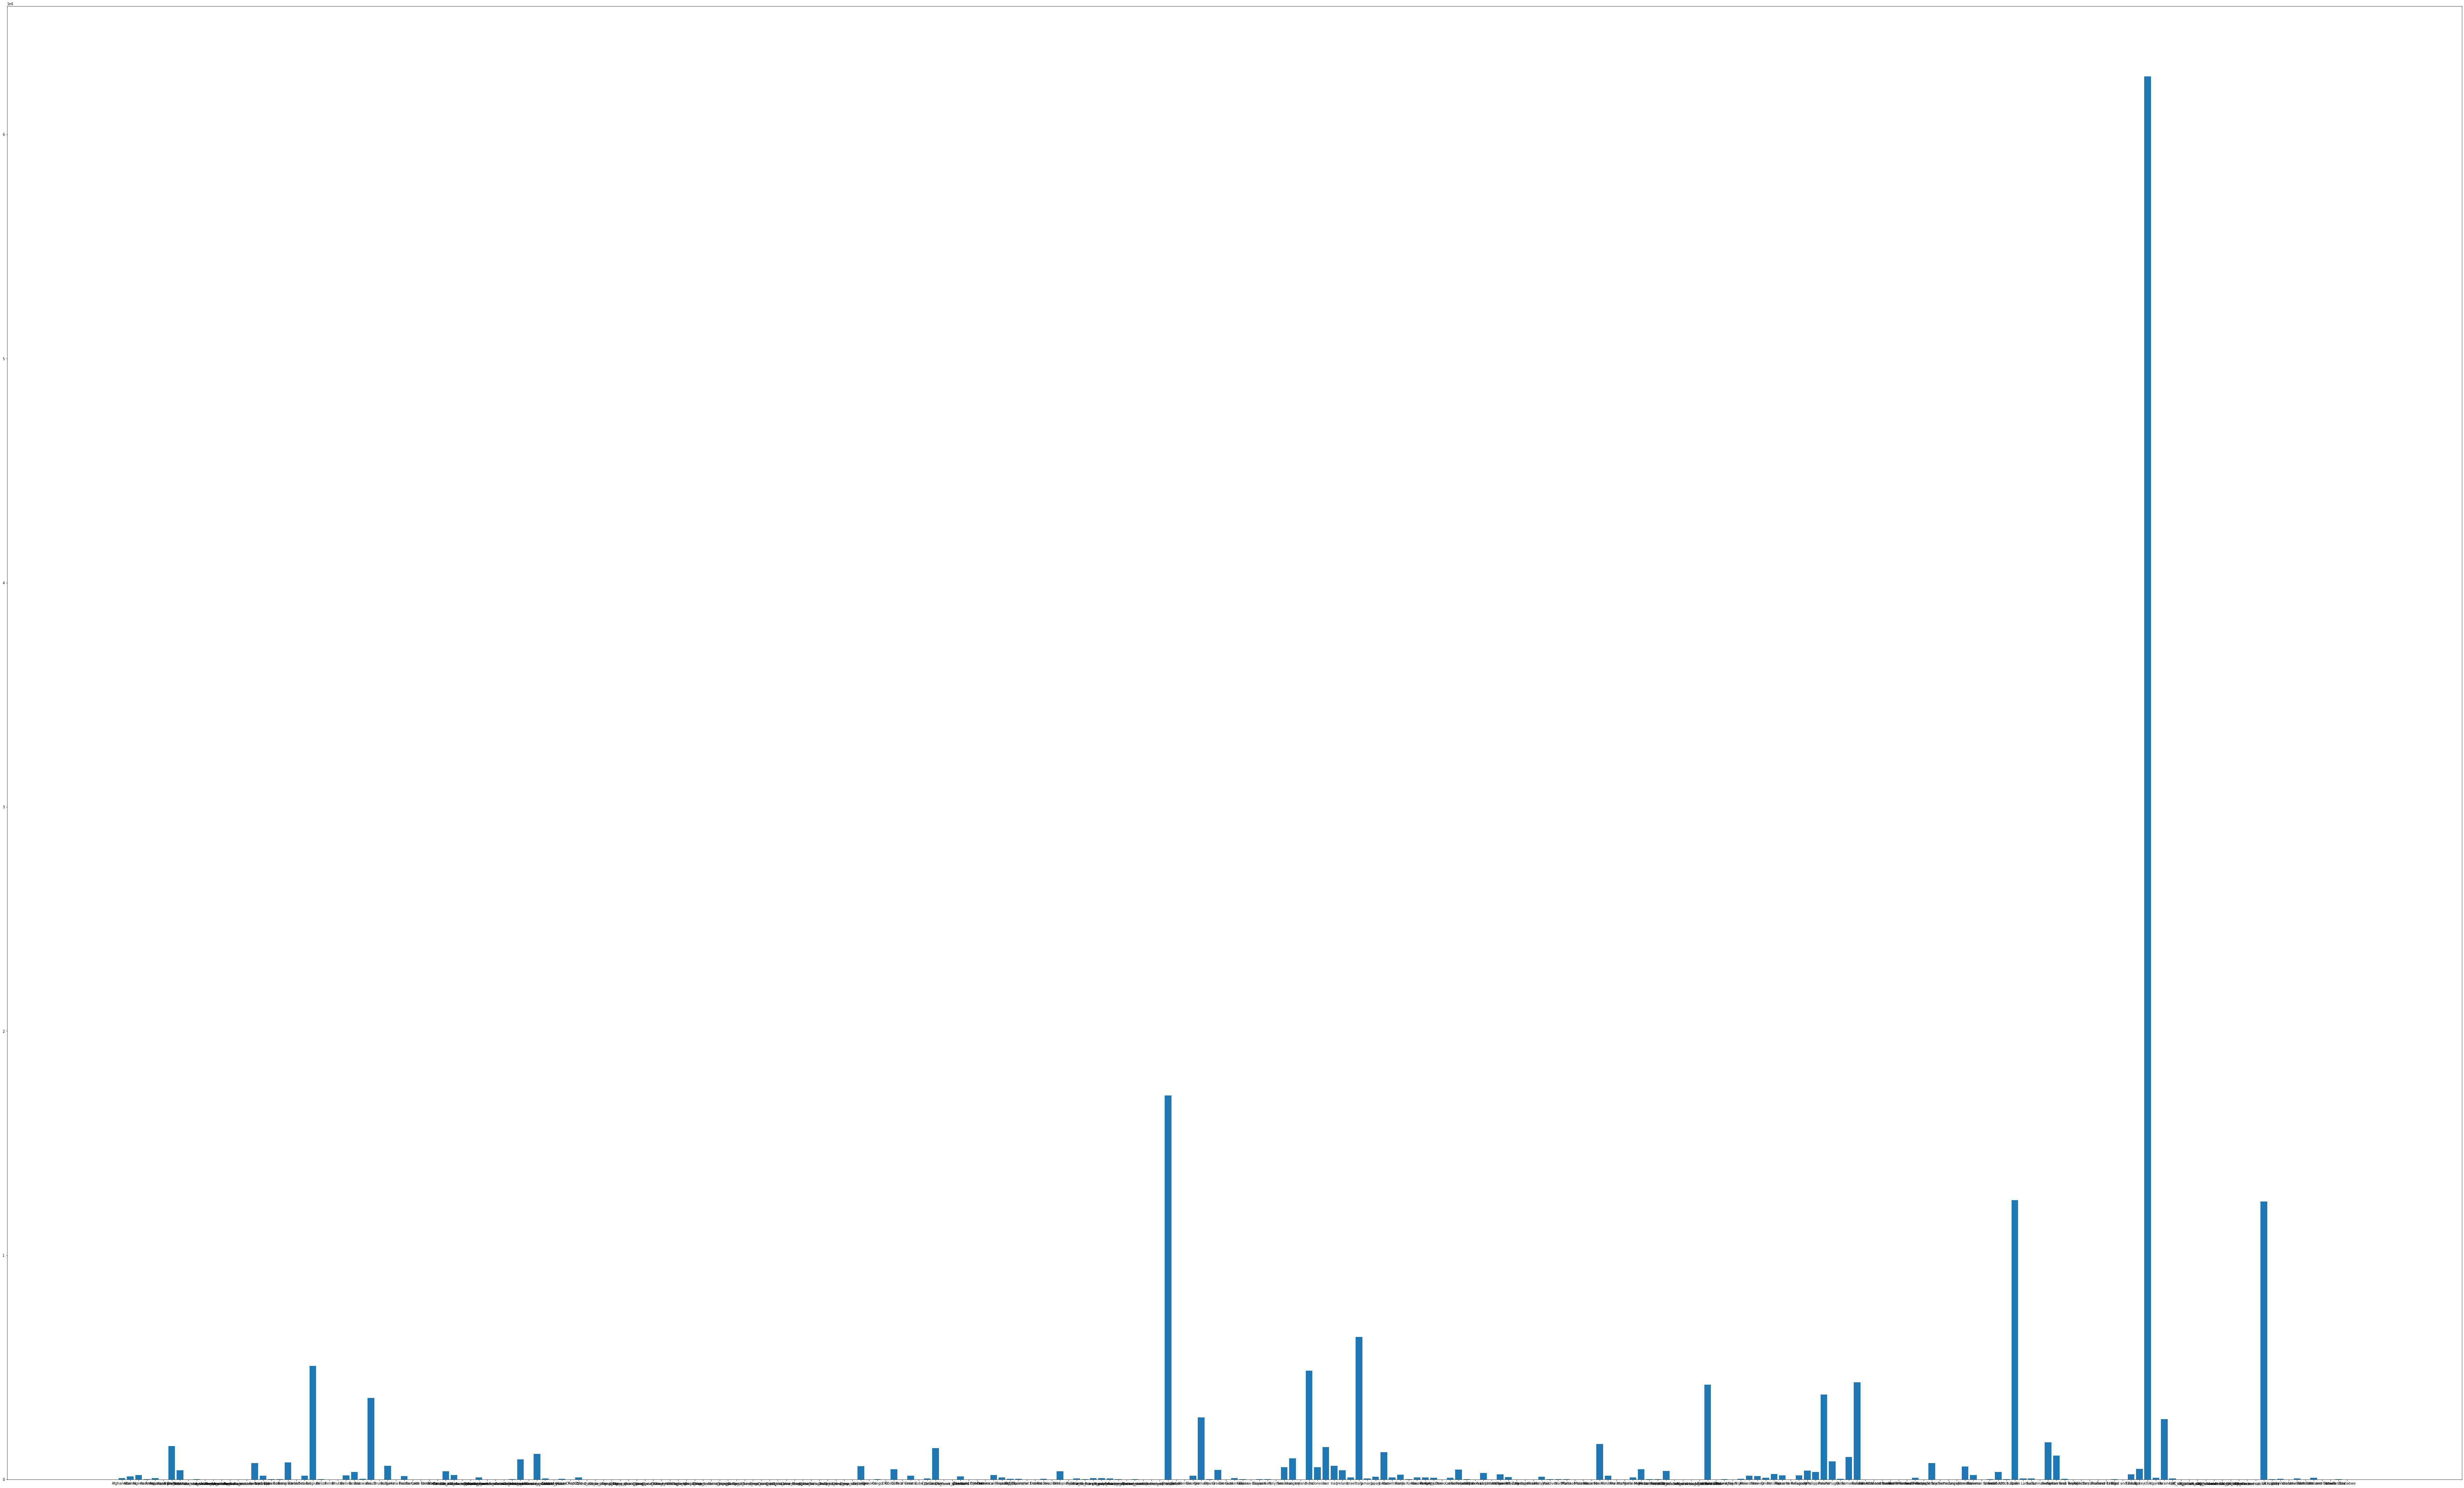

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,60))
ax = fig.add_axes([0,0,1,1])
plt.bar(countries, active_cases)
plt.show()

# Current Recovery Rate of all Countries

In [35]:
recovery_rate = []
for i in range(0, len(df.columns), 3):
  recovery_rate.append((df.iloc[-1, i+2]/df.iloc[-1, i]) * 100 if df.iloc[-1, i]!=0 else 0.0)
recovery_rate

[81.84133660474355,
 47.97222540154897,
 66.01339313141243,
 81.64173789173789,
 47.881713016164866,
 94.65648854961832,
 85.64918074392048,
 62.238196663116796,
 97.36842105263158,
 70.6198254643097,
 80.95238095238095,
 98.64750633981403,
 95.74468085106383,
 94.34782608695652,
 95.95478004423691,
 97.55154639175258,
 59.38879774501492,
 74.0372564657628,
 72.88040426726559,
 97.21351197263398,
 80.72790602952261,
 93.57429718875501,
 84.05504504096692,
 0.0,
 54.677980852915574,
 88.43178621659634,
 93.4959349593496,
 81.27777505616247,
 49.33155667491544,
 67.58662613981762,
 90.88268574241445,
 97.97297297297297,
 30.407274731330947,
 93.23279195668987,
 75.55565718467027,
 88.12199036918138,
 92.88219517227151,
 95.68106312292359,
 95.6425077812361,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 39.361702127659576,
 90.49429657794677,
 95.44808695420923,
 99.29435483870968,
 98.41605068637803,
 98.81154499151104,
 91.30434782608695,
 97.79005

# Bar Plot for Countries vs Recovery Rate

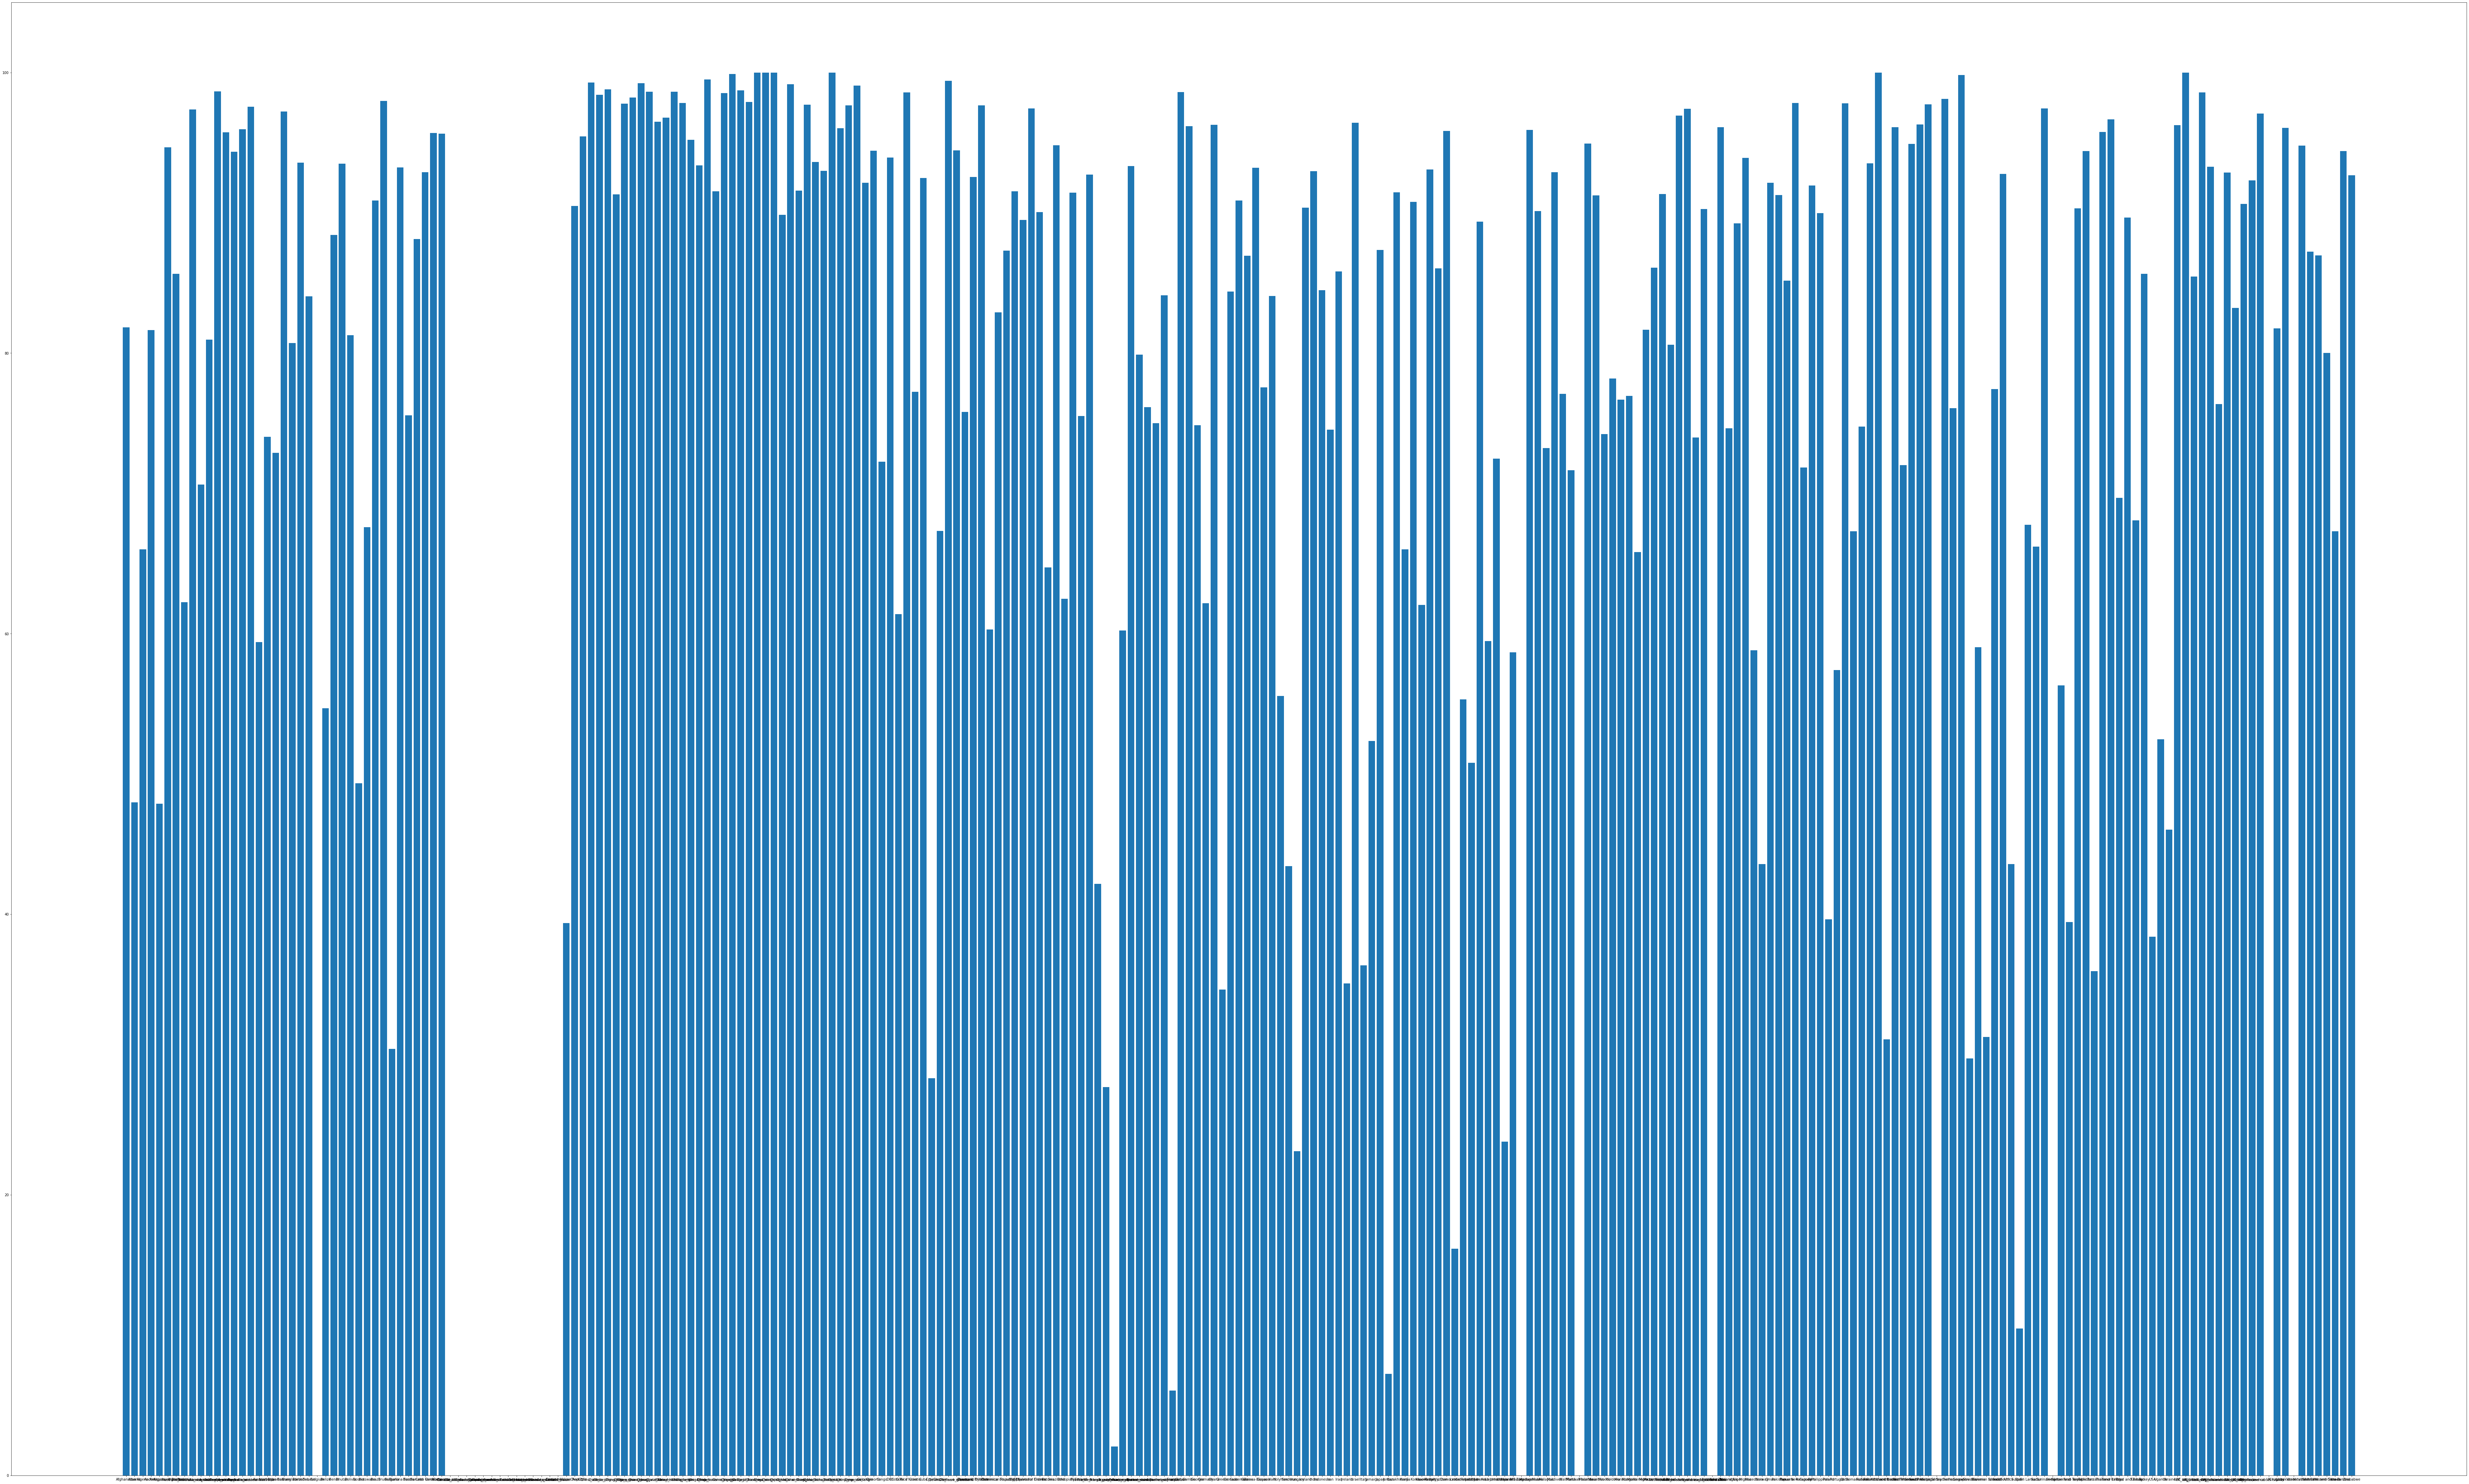

In [36]:
fig = plt.figure(figsize=(100,60))
ax = fig.add_axes([0,0,1,1])
plt.bar(countries, recovery_rate)
plt.show()

# Country with maximum Recovery Rate

In [40]:
max_recovery_rate = recovery_rate.index(max(recovery_rate))
country_with_max_recovery_rate = countries[max_recovery_rate]
country_with_max_recovery_rate

'China_macau'

# Current number of Confirmed Cases for all Countries

In [43]:
cases = []
for i in range(0, len(df.columns), 3):
  cases.append(df.iloc[-1, i])
cases

[42795,
 26211,
 65108,
 5616,
 13053,
 131,
 1284519,
 112680,
 114,
 4469,
 42,
 1183,
 517,
 230,
 20345,
 776,
 181642,
 70216,
 7124,
 84192,
 427198,
 249,
 110455,
 520393,
 4596,
 2844,
 369,
 142889,
 68293,
 8225,
 5781582,
 148,
 90725,
 2586,
 65598,
 623,
 9694,
 301,
 22490,
 36405,
 20369,
 0,
 13,
 9782,
 356,
 298,
 11,
 1134,
 93145,
 68,
 119894,
 4437,
 24,
 4888,
 1578,
 526438,
 992,
 947,
 589,
 460,
 181,
 1956,
 260,
 147,
 171,
 373,
 949,
 1287,
 5430,
 68147,
 1020,
 307,
 676,
 935,
 157,
 286,
 46,
 75,
 18,
 483,
 848,
 1271,
 218,
 783,
 285,
 1,
 980,
 214,
 1291,
 1174012,
 574,
 5379,
 11692,
 120939,
 20882,
 75922,
 7487,
 6646,
 446675,
 497,
 18,
 58963,
 712,
 5641,
 68,
 131636,
 177513,
 110095,
 36030,
 5104,
 493,
 6881,
 6060,
 101248,
 35,
 18542,
 10780,
 11485,
 8098,
 4732,
 4921,
 30,
 6735,
 109,
 16,
 655,
 1867721,
 9048,
 3697,
 69681,
 762832,
 49957,
 66637,
 32,
 113543,
 12537,
 2419,
 4662,
 9160,
 27,
 101468,
 126790,
 5160,


# Worst Affected Country

In [45]:
max_cases = cases.index(max(cases))
worst_affected_country = countries[max_cases]
worst_affected_country

'USA'

# Peak number of Active Cases for all Countries

In [49]:
max_active_cases = []
for i in range(0, len(df.columns), 3):
  temp_array = []
  for j in range(0, 296):
    temp_array.append(df.iloc[j, i] - (df.iloc[j, i+1] + df.iloc[j, i+2]) if df.iloc[j, i] - (df.iloc[j, i+1] + df.iloc[j, i+2]) >=0 else 0)
  max_active_cases.append(max(temp_array))
max_active_cases

[20311,
 13039,
 20017,
 1309,
 6516,
 44,
 174335,
 40976,
 76,
 2868,
 26,
 895,
 361,
 122,
 8490,
 358,
 72159,
 17325,
 2343,
 6979,
 115779,
 56,
 25477,
 506502,
 2008,
 929,
 85,
 60928,
 32853,
 4975,
 726064,
 109,
 61168,
 705,
 19859,
 120,
 1140,
 88,
 4183,
 36012,
 20081,
 0,
 13,
 9650,
 350,
 294,
 11,
 1069,
 89793,
 68,
 113337,
 4408,
 23,
 3095,
 400,
 82961,
 758,
 326,
 423,
 222,
 66,
 991,
 189,
 114,
 126,
 195,
 430,
 881,
 1517,
 50633,
 670,
 106,
 436,
 712,
 66,
 97,
 35,
 43,
 15,
 187,
 464,
 253,
 94,
 350,
 99,
 1,
 643,
 133,
 883,
 169326,
 104,
 2784,
 5722,
 45157,
 6170,
 16348,
 849,
 4730,
 188492,
 147,
 8,
 14073,
 691,
 2390,
 28,
 35057,
 44283,
 55230,
 11773,
 2556,
 159,
 2352,
 1627,
 45481,
 17,
 5044,
 3088,
 6591,
 5717,
 4597,
 1911,
 17,
 1674,
 28,
 10,
 154,
 1712489,
 3143,
 2108,
 19257,
 276408,
 8585,
 42604,
 14,
 27377,
 1686,
 1401,
 1146,
 5099,
 14,
 54850,
 94704,
 1252,
 1017754,
 66578,
 144898,
 63157,
 41303,
 72400

# Bar Plot for Countries vs Peak Active Cases

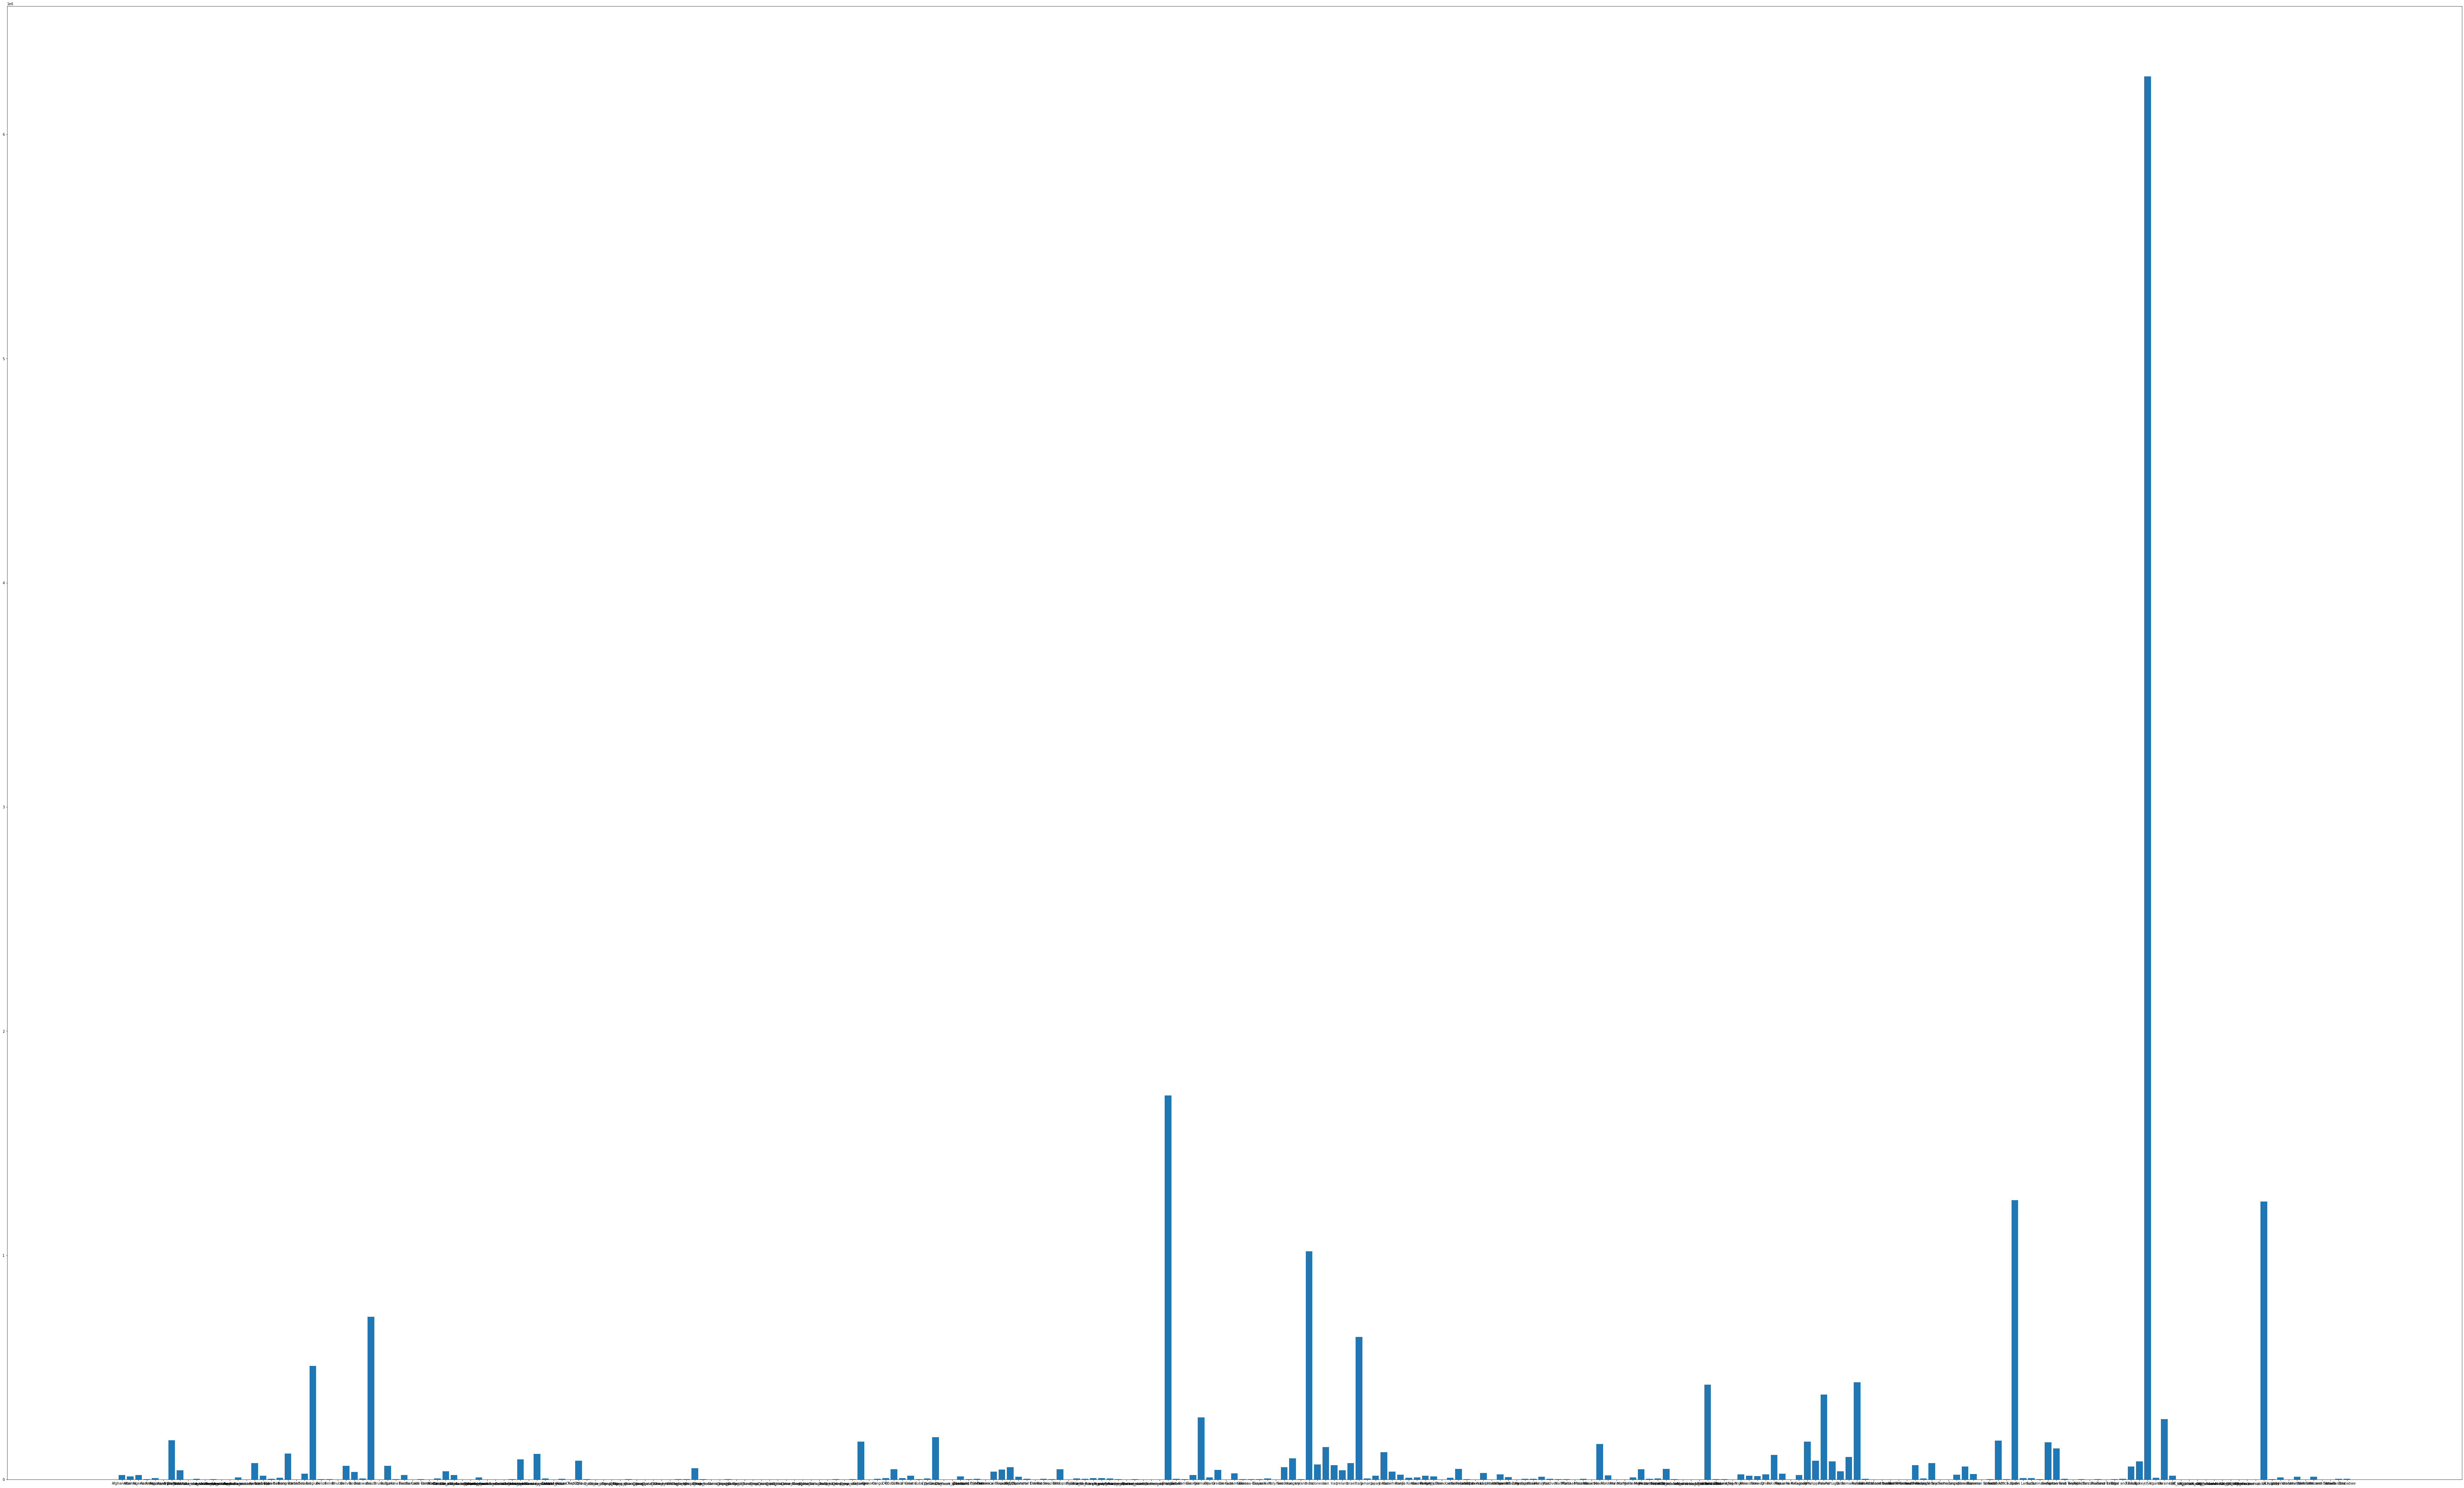

In [50]:
fig = plt.figure(figsize=(100,60))
ax = fig.add_axes([0,0,1,1])
plt.bar(countries, max_active_cases)
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2020-01-22 to 2020-11-12
Columns: 807 entries, Afghanistan_cases to Zimbabwe_recovered
dtypes: int64(807)
memory usage: 1.8 MB


In [62]:
date = list(df.index)

# Create a Dataframe for confirmed cases, deaths and recoveries in India

In [63]:
df_india = df[['India_cases'	,'India_deaths'	,'India_recovered']]
df_india

,India_cases,India_deaths,India_recovered
Report_Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-11-08,8553657,126611,7917373
2020-11-09,8591730,127059,7959406
2020-11-10,8636011,127571,8013783


In [64]:
india_active = []
for i in range(296):
  india_active.append(df_india.iloc[i, 0] - (df_india.iloc[i, 1] + df_india.iloc[i, 2]))
df_india['India_active'] = india_active
df_india

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,India_cases,India_deaths,India_recovered,India_active
Report_Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-11-08,8553657,126611,7917373,509673
2020-11-09,8591730,127059,7959406,505265
2020-11-10,8636011,127571,8013783,494657


In [65]:
df_india['date'] = date
df_india

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,India_cases,India_deaths,India_recovered,India_active,date
Report_Date,,,,,
2020-01-22,0,0,0,0,2020-01-22
2020-01-23,0,0,0,0,2020-01-23
2020-01-24,0,0,0,0,2020-01-24
2020-01-25,0,0,0,0,2020-01-25
2020-01-26,0,0,0,0,2020-01-26
...,...,...,...,...,...
2020-11-08,8553657,126611,7917373,509673,2020-11-08
2020-11-09,8591730,127059,7959406,505265,2020-11-09
2020-11-10,8636011,127571,8013783,494657,2020-11-10


# Dataframe with date and active cases in India for time series analysis

In [68]:
df_india = df_india[['date', 'India_active']]
df_india.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2020-01-22 to 2020-11-12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          296 non-null    datetime64[ns]
 1   India_active  296 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.9 KB


# Line Plot of active cases vs time

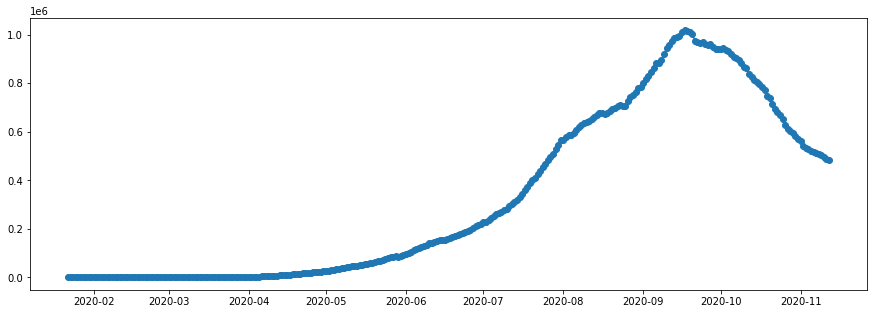

In [70]:
plt.figure(figsize=(15,5))
plt.plot(df_india['date'],df_india['India_active'])
plt.scatter(df_india['date'],df_india['India_active'])

# Rename Columns to 'ds' and 'y' as required by fbprophet

In [71]:
df_india = df_india.rename(columns={'date':'ds','India_active':'y'})

# Create an instance of Prophet object of fbprophet module and fit it on the above created dataframe.

In [77]:
import fbprophet
ac = fbprophet.Prophet()
ac.add_seasonality(name='Monthly',period=30,fourier_order=7)
ac.fit(df_india)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecast the active cases for next 12 months

In [78]:
forecast = ac.make_future_dataframe(periods=12,freq='M')
forecast = ac.predict(forecast)

In [79]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1.420647e+03,-4.249129e+04,36745.253821
1,2020-01-23,-5.888898e+02,-4.012971e+04,40389.890580
2,2020-01-24,-4.208690e+02,-3.949277e+04,39622.776698
3,2020-01-25,-2.905460e+03,-4.040638e+04,35884.884017
4,2020-01-26,-4.147458e+03,-4.487847e+04,36655.729592
...,...,...,...,...
303,2021-06-30,-1.294933e+06,-2.650717e+06,-32975.002415
304,2021-07-31,-1.538641e+06,-3.143734e+06,20787.476444
305,2021-08-31,-1.787700e+06,-3.656652e+06,52730.480890
306,2021-09-30,-2.023344e+06,-4.195525e+06,104057.725946


# Line plot of Active Cases and Forcasted values of active cases

Text(0.5, 1.0, 'Covid-19 Forecasting')

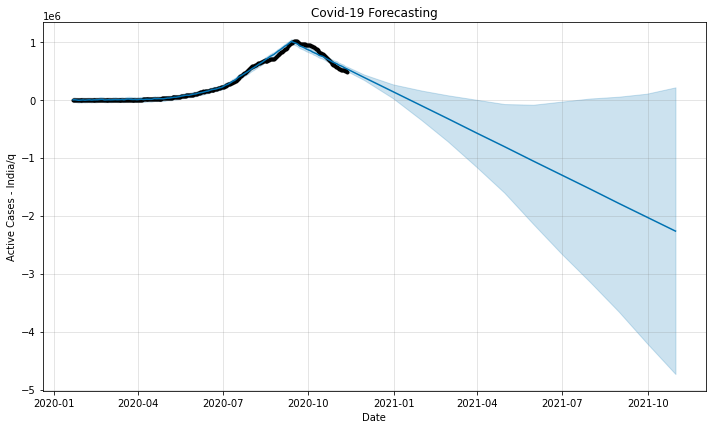

In [80]:
ac.plot(forecast,xlabel = 'Date',ylabel = 'Active Cases - India/q')
plt.title('Covid-19 Forecasting')